### 棒グラフ
サンプルコードは以下  
Kaggleで有名なタイタニックの生存者のデータセットを`pandas`のデータフレームとして読み込む。  

In [1]:
import seaborn as sns
print(sns.__version__)

0.9.0


バージョン0.8だとうまく表示できなかった。

In [10]:
# 利用できるデータセットの名称の取得
sns.get_dataset_names()

/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/seaborn/utils.py:376: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

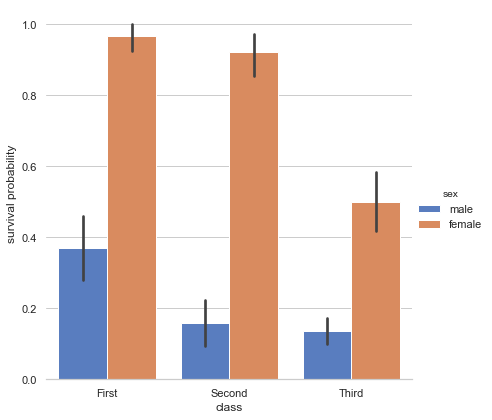

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

titanic.head(5)

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [7]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


xのclassってそういう列名が存在している。  
yのsurvived, hueのsexもある。  
hueは色相の意味  
また、catplot関数でkind="bar"を指定すると、barplotが呼び出されるそう。

<AxesSubplot:xlabel='class', ylabel='survived'>

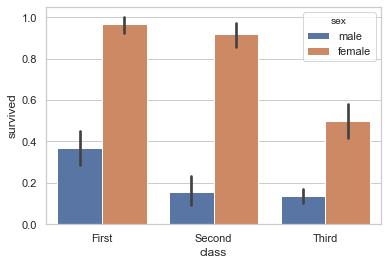

In [8]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic)

<AxesSubplot:xlabel='class', ylabel='survived'>

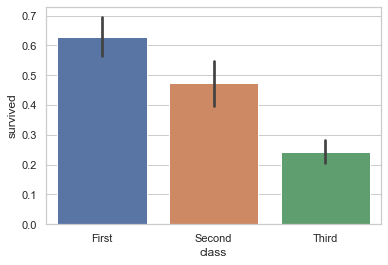

In [9]:
sns.barplot(x="class", y="survived", data=titanic)

### 折れ線グラフ
折れ線グラフでは、ある時点とある時点を左から右に線で結んで「先の傾きが大きい（小さい）時点はどれだろう？」、「傾きの傾向が変化するのはどの時点だろう？」と考えます。

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

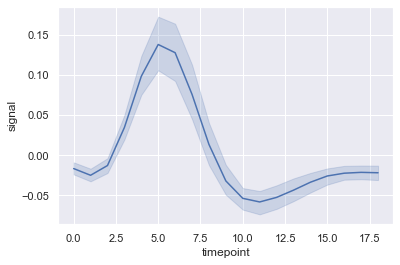

In [11]:
import seaborn as sns; sns.set()
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", data=fmri)

fmriデータとは、  
よくわからなかった、公式はもっと複雑な例をやってみようくらいのノリ。 (本当にそうみたい)
上下に書かれているのは、例によってデフォルトでは95%信頼区間だそう。

In [12]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


また層別する場合はhue引数を指定する

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

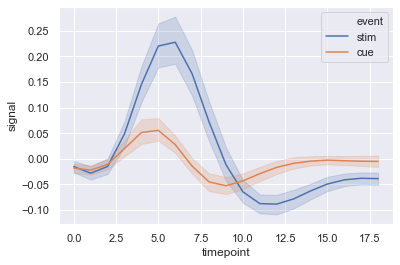

In [13]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

### ヒストグラム
これもデータの「偏り」や「分布」を俯瞰して見るのに適したグラフ。 
ヒストグラムはdistplot関数でプロットできます。ヒストグラムの場合は「数値の配列を、適切な粒度で集計して棒グラフにする」指定方法をします。

<AxesSubplot:xlabel='fare'>

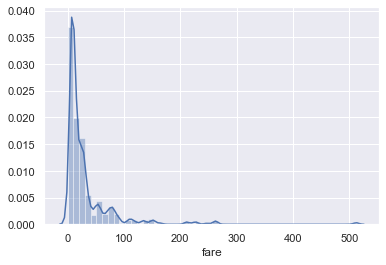

In [14]:
sns.distplot(titanic['fare'])

ヒストグラム以外にプロットしてしまうのは、gaussian kernel density estimate で推定した値のよう。2次元でもプロットできるよう。  
もしヒストグラムのみ表示したい場合は以下。

<AxesSubplot:xlabel='fare'>

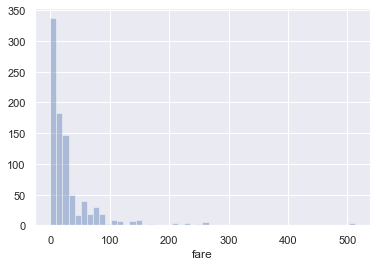

In [15]:
sns.distplot(titanic['fare'], kde=False)

他の変数で層別してヒストグラムを作る

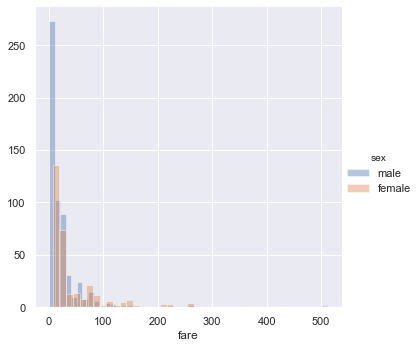

In [16]:
# heightが未定義だと画像が小さくなってしまう。
g = sns.FacetGrid(titanic, hue="sex", height=5)
g.map(sns.distplot, "fare", kde=False)
g.add_legend()

### ヒートマップ
「どのデータ項目にデータが偏っているか」を考える。

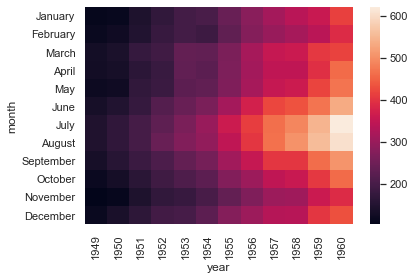

In [17]:
flights =sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [18]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### 散布図
表現した点を俯瞰して見て「縦軸と横軸の相関（2つのデータ項目が密接に関わり合っている状態）はあるだろうか？」と考えます。つまり散布図が一番得意な表現方法は、2つのデータ項目の「関係」です  
`joinplot`でヒストグラムと併せて書きます。

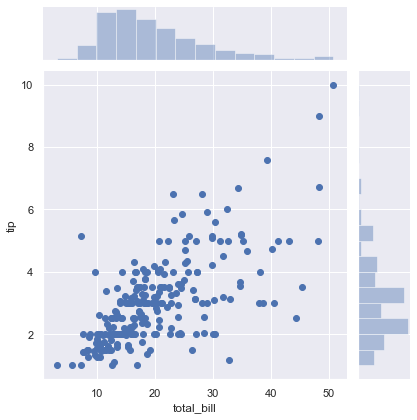

In [19]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

`scatterplot`を使うとヒストグラムがないバージョンもできるし、  
`pairplot`を使えば変数の組み合わせで一気にかける

上記、等高線にする

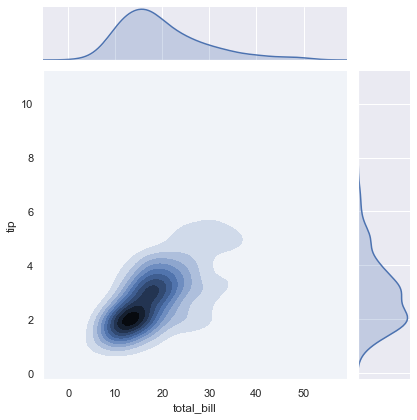

In [21]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

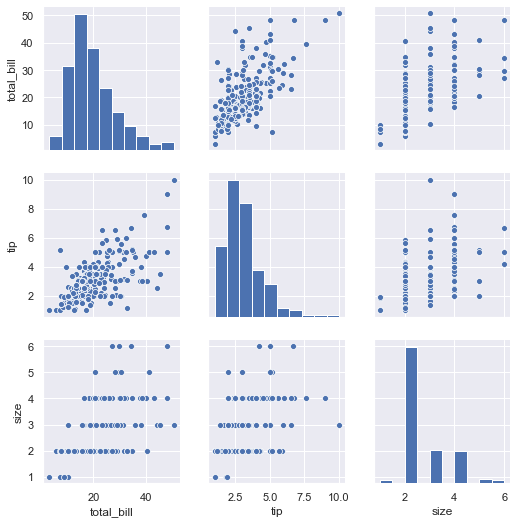

In [24]:
pg = sns.pairplot(tips)

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


pairplotは与えられたデータの変数の要素の交差表を自動的に作成し、
同一データ同士の交差する点（対角線）についてはヒストグラム
異なるデータ同士が交差する点については散布図
を描画します。